<a href="https://colab.research.google.com/github/AshishGusain17/via_google_colab/blob/master/pose_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose/

Cloning into 'openpose'...
remote: Enumerating objects: 22330, done.
remote: Total 22330 (delta 0), reused 0 (delta 0), pack-reused 22330
Receiving objects: 100% (22330/22330), 84.29 MiB | 18.79 MiB/s, done.
Resolving deltas: 100% (17536/17536), done.


In [95]:
%cd openpose/models
!sudo chmod a+x getModels.sh
!./getModels.sh

/content/openpose/models/openpose/models
--2020-02-13 16:53:11--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/body_25/pose_iter_584000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.176.37
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.176.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104715850 (100M) [text/plain]
Saving to: ‘pose/body_25/pose_iter_584000.caffemodel’

pose_iter_584000.ca 100%[===================>]  99.86M  23.5MB/s    in 6.4s    

2020-02-13 16:53:18 (15.7 MB/s) - ‘pose/body_25/pose_iter_584000.caffemodel’ saved [104715850/104715850]

--2020-02-13 16:53:18--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/coco/pose_iter_440000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.176.37
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.176.37|:80... connected.
HTTP re

In [0]:
import cv2
protoFile = "/content/openpose/models/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "/content/openpose/models/pose/mpi/pose_iter_160000.caffemodel"
 
# Read the network into Memory
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [0]:
frame = cv2.imread("/content/sample.jpg")
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
 
# Specify the input image dimensions
inWidth = 356
inHeight = 356
 
# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)
 
# Set the prepared object as the input blob of the network
net.setInput(inpBlob)

In [0]:
out = net.forward()

In [0]:
BODY_PARTS={"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
"LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
"RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
"Background": 15}

In [0]:
POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
             ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
             ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
             ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]

In [162]:
from google.colab.patches import cv2_imshow
ct=0
points=[]
for i in range(len(BODY_PARTS)):
    # Slice heatmap of corresponging body's part.
    heatMap = out[0, i, :, :]
 
    # Originally, we try to find all the local maximums. To simplify a sample
    # we just find a global one. However only a single pose at the same time
    # could be detected this way.
    _, conf, _, point = cv2.minMaxLoc(heatMap)
    x = (frameWidth * point[0]) / out.shape[3]
    y = (frameHeight * point[1]) / out.shape[2]
    if ct<20:
      print((frameWidth * point[0]) , (frameHeight * point[1]))
      print(x,y,conf)
    ct=ct+1
 
    # Add a point if it's confidence is higher than threshold.
    points.append((int(x), int(y)) if conf > 0.5 else None)
print(points[0:20])
frame.shape

9500 5334
211.11111111111111 118.53333333333333 0.7187002897262573
10000 9144
222.22222222222223 203.2 0.8755209445953369
8000 9906
177.77777777777777 220.13333333333333 0.7769566774368286
7500 12954
166.66666666666666 287.8666666666667 0.855797290802002
6500 15240
144.44444444444446 338.6666666666667 0.8354374170303345
12500 9906
277.77777777777777 220.13333333333333 0.7234223484992981
15500 11430
344.44444444444446 254.0 0.6932222247123718
12500 10668
277.77777777777777 237.06666666666666 0.7379584908485413
9000 16002
200.0 355.6 0.6373358964920044
11500 21336
255.55555555555554 474.1333333333333 0.8487329483032227
13000 27432
288.8888888888889 609.6 0.8171333074569702
10500 16764
233.33333333333334 372.53333333333336 0.5246535539627075
8500 22098
188.88888888888889 491.06666666666666 0.7250364422798157
6000 24384
133.33333333333334 541.8666666666667 0.8400981426239014
10000 12954
222.22222222222223 287.8666666666667 0.7587942481040955
4500 25146
100.0 558.8 1.0048609972000122
[(211,

(762, 500, 3)

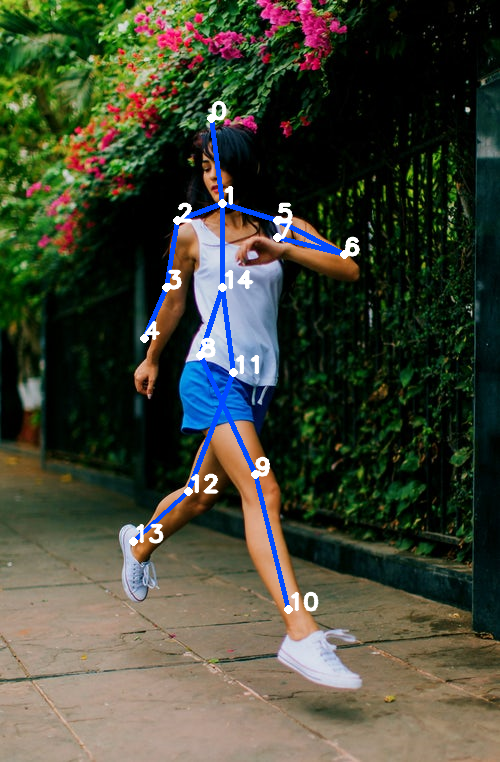

In [161]:
# frame=cv2.resize(frame,(200,200))
cv2_imshow(frame)
for pair in POSE_PAIRS:
    partFrom = pair[0]
    partTo = pair[1]
    assert(partFrom in BODY_PARTS)
    assert(partTo in BODY_PARTS)
 
    idFrom = BODY_PARTS[partFrom]
    idTo = BODY_PARTS[partTo]
    if points[idFrom] and points[idTo]:
        cv2.line(frame, points[idFrom], points[idTo], (255, 74, 0), 3)
        cv2.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (255, 255, 255), cv2.FILLED)
        cv2.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (255, 255, 255), cv2.FILLED)
        cv2.putText(frame, str(idFrom), points[idFrom], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255),2,cv2.LINE_AA)
        cv2.putText(frame, str(idTo), points[idTo], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255),2,cv2.LINE_AA)